In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import seaborn as sns 
from tensorflow.keras.callbacks import TensorBoard 
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/adam_base_epoch00008") 


2024-04-20 10:32:57.366885: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
    '/Users/rangal/Downloads/archive-2',
    target_size=(200,200),
    batch_size=32,
    class_mode='categorical' 
)

Found 54706 images belonging to 2 classes.


In [10]:
import os
safe = 0
cancer = 0

data_dir = '/Users/rangal/Downloads/archive-2'

class_names = ['safe','cancer']
print("Classes found:", class_names)

num_samples_per_class = {class_name: len(os.listdir(os.path.join(data_dir, class_name))) for class_name in class_names}

print("Number of samples for each class:")
print(num_samples_per_class)

Classes found: ['safe', 'cancer']
Number of samples for each class:
{'safe': 53548, 'cancer': 1158}


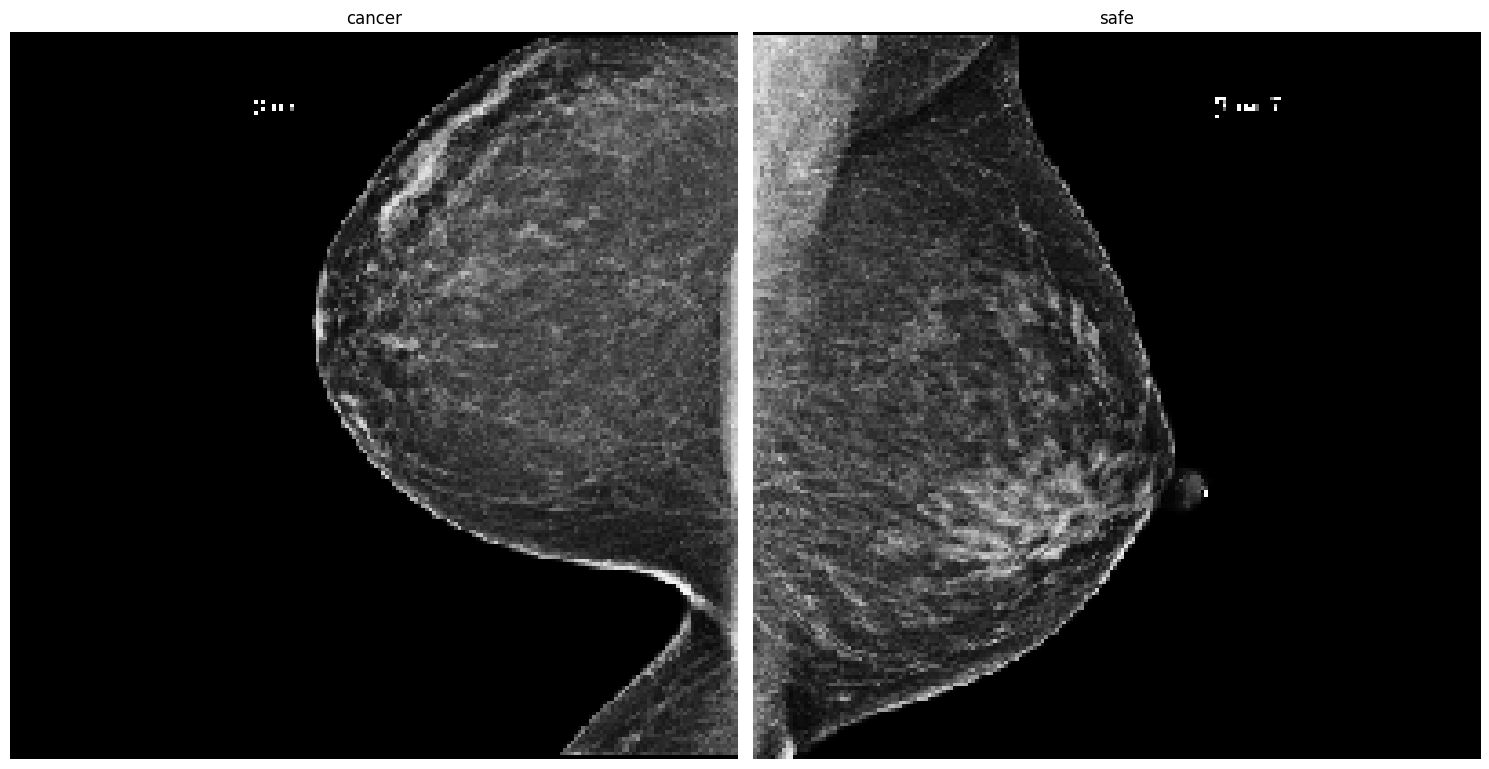

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Load the class indices from the generator
class_indices = train_generator.class_indices

# Invert the dictionary to get class names from indices
class_names = {v: k for k, v in class_indices.items()}

# Choose one image from each class for display
images_to_display = {}

for class_name, class_index in class_indices.items():
    # Find the first image in the batch that belongs to this class
    for i in range(len(train_generator)):
        images, labels = train_generator[i]
        class_labels = np.argmax(labels, axis=1)
        idx = np.where(class_labels == class_index)[0]
        if len(idx) > 0:
            images_to_display[class_name] = images[idx[0]]
            break

# Plot one image from each class
plt.figure(figsize=(15, 10))
for idx, (class_name, img) in enumerate(images_to_display.items()):
    plt.subplot(1, len(class_indices), idx + 1)
    plt.imshow(image.array_to_img(img))
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

class_names = ['safe','cancer']

image_files = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    class_files = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir)]
    image_files.extend(class_files)
    labels.extend([class_name] * len(class_files)) 

image_files, labels = np.array(image_files), np.array(labels)
indices = np.arange(len(image_files))
np.random.shuffle(indices)
image_files = image_files[indices]
labels = labels[indices]

train_files, temp_files, train_labels, temp_labels = train_test_split(
    image_files, labels, test_size=0.30, random_state=42)  

val_files, test_files, val_labels, test_labels = train_test_split(
    temp_files, temp_labels, test_size=0.10, random_state=42) 

print("Training set size:", len(train_files))
print("Validation set size:", len(val_files))
print("Test set size:", len(test_files))


Training set size: 38294
Validation set size: 14770
Test set size: 1642


In [26]:
from pandas import DataFrame

train_df = DataFrame({'filename': train_files, 'class': train_labels})
val_df = DataFrame({'filename': val_files, 'class': val_labels})
test_df = DataFrame({'filename': test_files, 'class': test_labels})

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='class',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='filename',
    y_col='class',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='class',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

Found 38294 validated image filenames belonging to 2 classes.
Found 14770 validated image filenames belonging to 2 classes.
Found 1642 validated image filenames belonging to 2 classes.


In [30]:
#Batch check
print("Found classes:", train_generator.class_indices)
print("Number of images found:", train_generator.samples)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Found classes: {'cancer': 0, 'safe': 1}
Number of images found: 38294
data batch shape: (32, 200, 200, 3)
labels batch shape: (32, 2)


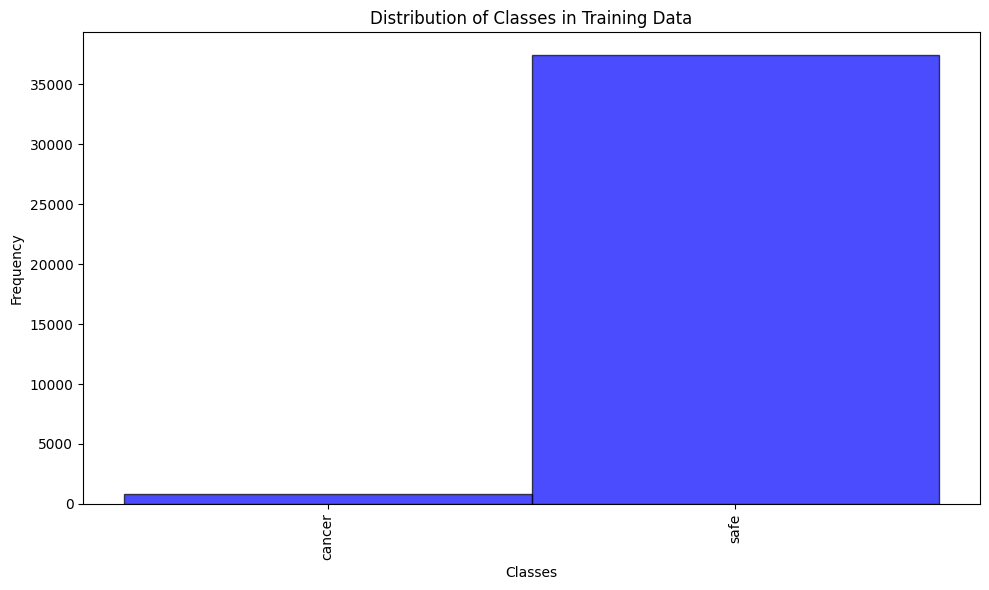

In [31]:
# Get the class indices
class_indices = train_generator.class_indices

# Invert the dictionary to get the class labels
class_labels = {v: k for k, v in class_indices.items()}

# Get the class labels from the generator
labels = train_generator.classes

# Plotting the histogram of class distribution
plt.figure(figsize=(10, 6))

# Calculate the number of classes
num_classes = len(class_labels)

# Plot the histogram
hist, bins, _ = plt.hist(labels, bins=num_classes, alpha=0.7, color='blue', edgecolor='black')

# Calculate the middle positions of the bars for aligning the ticks
middle_positions = 0.5 * (bins[:-1] + bins[1:])

# Set the ticks to align with the middle of each bar
plt.xticks(middle_positions, list(class_labels.values()), rotation='vertical')

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in Training Data')
plt.tight_layout()
plt.show()

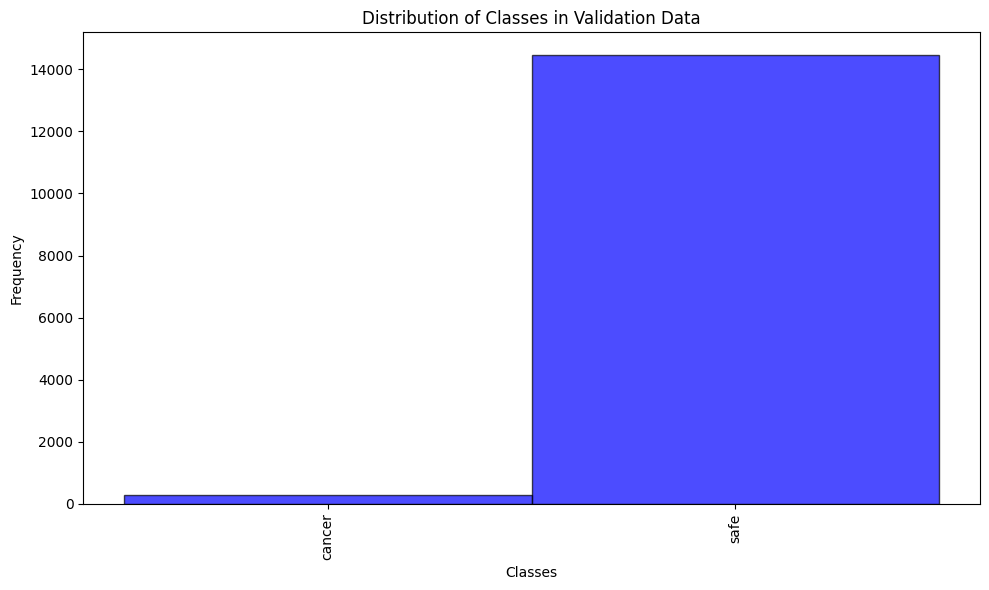

In [32]:
# Get the class indices
class_indices =val_generator.class_indices

# Invert the dictionary to get the class labels
class_labels = {v: k for k, v in class_indices.items()}

# Get the class labels from the generator
labels = val_generator.classes

# Plotting the histogram of class distribution
plt.figure(figsize=(10, 6))

# Calculate the number of classes
num_classes = len(class_labels)

# Plot the histogram
hist, bins, _ = plt.hist(labels, bins=num_classes, alpha=0.7, color='blue', edgecolor='black')

# Calculate the middle positions of the bars for aligning the ticks
middle_positions = 0.5 * (bins[:-1] + bins[1:])

# Set the ticks to align with the middle of each bar
plt.xticks(middle_positions, list(class_labels.values()), rotation='vertical')

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in Validation Data')
plt.tight_layout()
plt.show()

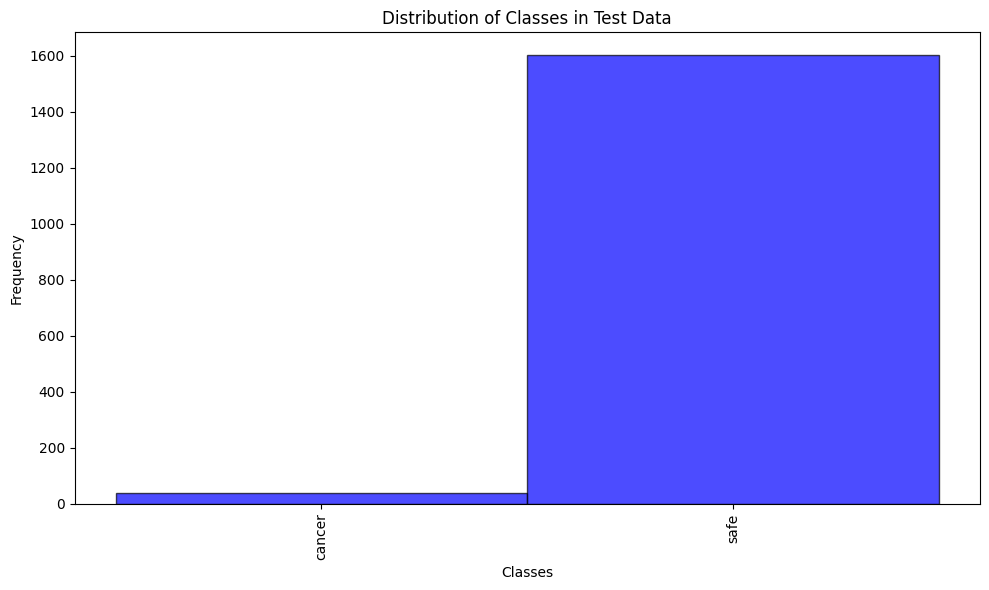

In [33]:
# Get the class indices
class_indices =test_generator.class_indices

# Invert the dictionary to get the class labels
class_labels = {v: k for k, v in class_indices.items()}

# Get the class labels from the generator
labels = test_generator.classes

# Plotting the histogram of class distribution
plt.figure(figsize=(10, 6))

# Calculate the number of classes
num_classes = len(class_labels)

# Plot the histogram
hist, bins, _ = plt.hist(labels, bins=num_classes, alpha=0.7, color='blue', edgecolor='black')

# Calculate the middle positions of the bars for aligning the ticks
middle_positions = 0.5 * (bins[:-1] + bins[1:])

# Set the ticks to align with the middle of each bar
plt.xticks(middle_positions, list(class_labels.values()), rotation='vertical')

plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in Test Data')
plt.tight_layout()
plt.show()

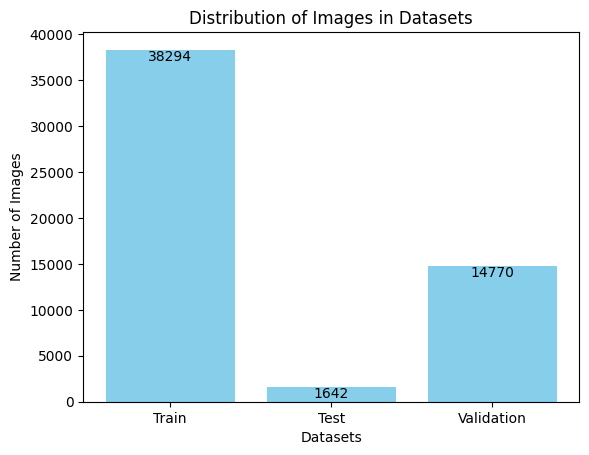

In [37]:
# Count the number of images in each directory
num_train_images = len(train_generator.filenames)
num_test_images = len(test_generator.filenames)
num_val_images = len(val_generator.filenames)

# Create a bar chart to visualize the distribution of images
labels = ['Train', 'Test', 'Validation']
num_images = [num_train_images, num_test_images, num_val_images]

plt.bar(labels, num_images, color='skyblue')
plt.xlabel('Datasets')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in Datasets')

# Add labels with the number of images on the bars
for i, v in enumerate(num_images):
    plt.text(i, v + 10, str(v), ha='center', va='top')

plt.show()

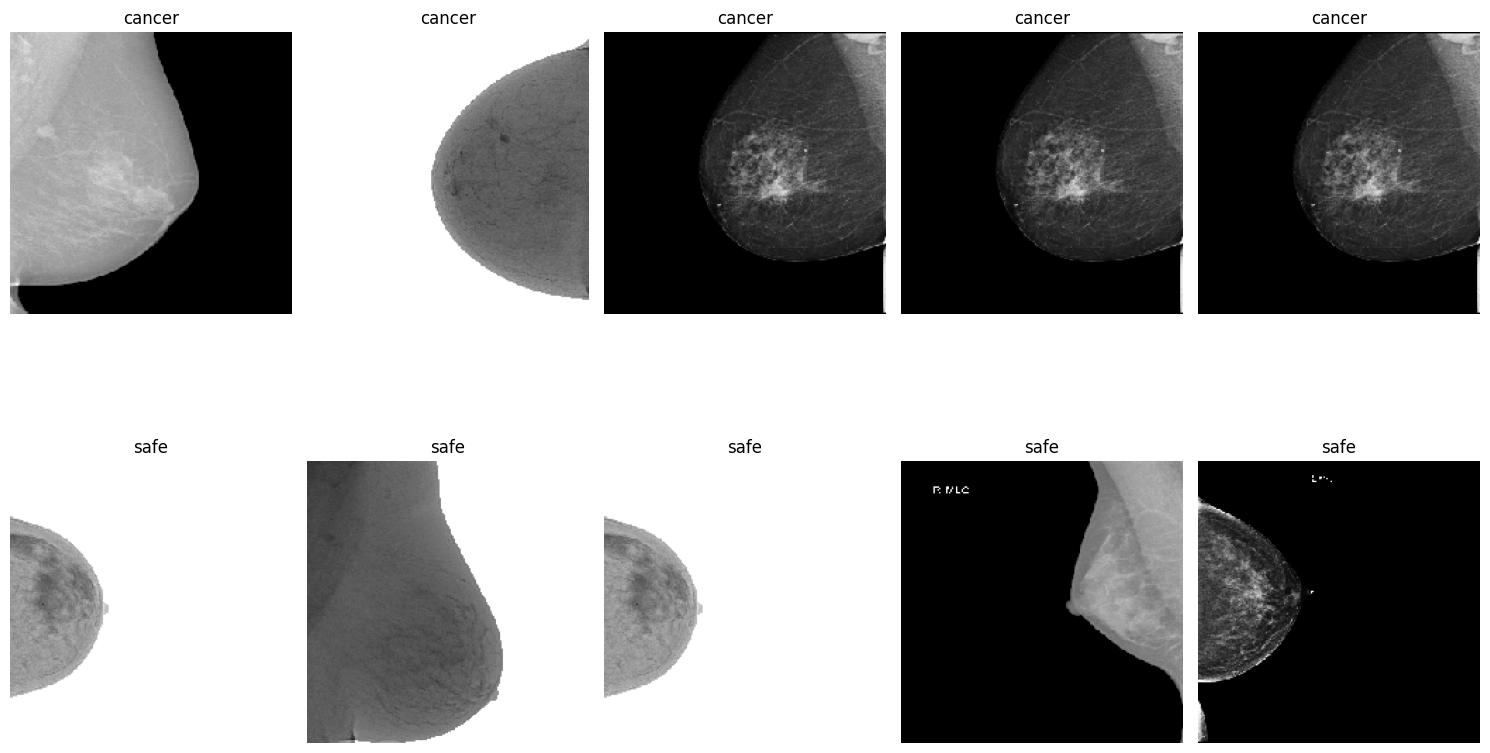

In [39]:
import random
num_images_per_class = 5  # Number of images you want to sample from each class
# Get class indices and labels
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

# Create a dictionary to store sampled images for each class
sampled_images = {label: [] for label in class_labels}

# Iterate through the generator to sample images
num_images_collected = {label: 0 for label in class_labels}
total_images_to_collect = num_images_per_class * len(class_labels)

while total_images_to_collect > sum(num_images_collected.values()):
    batch = train_generator.next()
    images, labels = batch

    for i, label in enumerate(labels):
        class_label = class_labels[np.argmax(label)]
        if num_images_collected[class_label] < num_images_per_class:
            sampled_images[class_label].append(images[i])
            num_images_collected[class_label] += 1

    if sum(num_images_collected.values()) >= total_images_to_collect:
        break

# Display sampled images (one image from each class)
plt.figure(figsize=(15, 10))
for i, label in enumerate(class_labels):
    for j in range(num_images_per_class):
        plt.subplot(len(class_labels), num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(random.choice(sampled_images[label]))
        plt.title(label)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [41]:
for images, labels in train_generator:
    print('Image batch shape:', images.shape)
    print('Label batch shape:', labels.shape)
    break

Image batch shape: (32, 200, 200, 3)
Label batch shape: (32, 2)


In [ ]:
##Final Model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

# Load the pre-trained VGG16 model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(200,200, 3))

# Freeze the lower layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Add top layers for fine-tuning
x = vgg16_base.output
x = Flatten()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.1)(x)
x = Dense(56, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.1)(x)
outputs = Dense(2, activation='softmax')(x)

# Create the fine-tuned model
model = tf.keras.Model(inputs=vgg16_base.input, outputs=outputs)

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=15, validation_data=test_generator)

Epoch 1/15
  59/1197 [>.............................] - ETA: 1:06:26 - loss: 1.4579 - accuracy: 0.9619